In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import datetime
from sklearn import model_selection

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


# Reading Datasets

In [3]:
train=pd.read_csv('train.csv')
clm=['Total_booking']
train_labels=pd.read_csv('train_label.csv',names=clm)

# Adding target column 

In [4]:
train=pd.concat([train, train_labels], axis = 1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


# Changing type of date column

In [5]:
train['datetime']=train['datetime'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


# Checking datatypes of columns

In [7]:
train.dtypes

datetime         datetime64[ns]
season                   object
holiday                   int64
workingday                int64
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
dtype: object

# Missing value analysis

In [8]:
pd.isnull(train).any()

datetime         False
season           False
holiday          False
workingday       False
weather          False
temp             False
atemp            False
humidity         False
windspeed        False
Total_booking    False
dtype: bool

In [9]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [10]:
columns=train.columns
columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Total_booking'],
      dtype='object')

In [25]:
train[(train['Total_booking'] == 13) & (train['windspeed'] < 7)].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
1124,2012-09-17 02:00:00,Fall,0,1,Clear + Few clouds,21.32,25.000,72,0.0000,13
1263,2011-05-07 06:00:00,Summer,0,0,Clear + Few clouds,17.22,21.210,77,6.0032,13
1710,2011-05-17 01:00:00,Summer,0,1,"Light Snow, Light Rain",22.96,26.515,88,0.0000,13
1966,2011-05-01 06:00:00,Summer,0,0,Mist + Cloudy,16.40,20.455,82,6.0032,13
2315,2011-07-05 02:00:00,Fall,0,1,Clear + Few clouds,27.06,31.060,74,6.0032,13


In [35]:
train[(train['Total_booking'] > 300 ) & (train['season'] == 'Winter' ) ].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
6,2012-10-06 09:00:00,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395
16,2012-10-06 11:00:00,Winter,0,0,Clear + Few clouds,26.24,30.305,65,16.9979,647
18,2011-10-09 19:00:00,Winter,0,0,Clear + Few clouds,22.96,26.515,73,6.0032,302
26,2012-12-03 07:00:00,Winter,0,1,Mist + Cloudy,13.94,18.180,93,0.0000,396
39,2012-12-17 18:00:00,Winter,0,1,Mist + Cloudy,16.40,20.455,94,6.0032,507


In [36]:
train[(train['Total_booking'] > 300 ) & (train['season'] == 'Summer' ) ].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
13,2012-06-14 09:00:00,Summer,0,1,Clear + Few clouds,25.42,30.305,61,15.0013,357
27,2012-05-02 18:00:00,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813
46,2011-06-13 20:00:00,Summer,0,1,Clear + Few clouds,26.24,31.060,44,16.9979,331
52,2012-06-05 18:00:00,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790


# Checking unique values for all columns

In [11]:
for clm in columns:
    u=train[clm].unique()
    print(clm+':')
    print(u)
    print('-----------------------------------------------------')

datetime:
['2012-05-02T19:00:00.000000000' '2012-09-05T04:00:00.000000000'
 '2011-01-13T09:00:00.000000000' ... '2011-04-12T03:00:00.000000000'
 '2012-11-07T01:00:00.000000000' '2011-01-10T10:00:00.000000000']
-----------------------------------------------------
season:
['Summer' 'Fall' 'Spring' 'Winter']
-----------------------------------------------------
holiday:
[0 1]
-----------------------------------------------------
workingday:
[1 0]
-----------------------------------------------------
weather:
[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']
-----------------------------------------------------
temp:
[22.14 28.7   5.74 13.94 30.34 33.62 24.6  21.32 27.06 12.3  18.04 18.86
 25.42 13.12 22.96 26.24 17.22 27.88 36.9  29.52 31.16 10.66 31.98 15.58
  6.56 19.68 16.4  14.76  9.02 32.8  11.48 20.5   9.84  8.2   7.38 23.78
 35.26 37.72  3.28  4.1  36.08  1.64  4.92 34.44  0.82  2.46 38.54 39.36
 41.  ]
-----------------------------

# Creating dummy columns for categorical variables

In [11]:
train=pd.get_dummies(train)

In [13]:
train.head(2)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-02 19:00:00,0,1,22.14,25.760,77,16.9979,504,0,0,1,0,1,0,0,0
1,2012-09-05 04:00:00,0,1,28.70,33.335,79,19.0012,5,1,0,0,0,1,0,0,0


# Outlier Analysis

In [14]:
def find_outliers(data,column_name):
    # Set upper and lower limit to 3 standard deviation
    data_std = data[column_name].std()
    data_mean = np.mean(data[column_name])
    outliers_cut_off = data_std * 3
    
    lower_limit  = data_mean - outliers_cut_off 
    upper_limit = data_mean + outliers_cut_off
    print(column_name)
    print(lower_limit)
    print(upper_limit)
    
    # Generate outliers
    outliers=[]
    index_outliers=[]
    for outlier in data[column_name]:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)
            #index_outliers.append(data[data[column_name]==outlier].index.values.astype(int)[0])
    
    print(outliers)
    print('----------------------------------------')
    #print(index_outliers)
    #print('==========================================')

In [15]:
column=['temp','atemp', 'humidity','windspeed']
for clm in column:
    find_outliers(train,clm)

temp
-3.1974618482995787
43.68350227089954
[]
----------------------------------------
atemp
-1.8477677762246145
49.15887135913707
[]
----------------------------------------
humidity
4.050440630479663
119.24790571770592
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
----------------------------------------
windspeed
-11.727051454817166
37.41483298903901
[47.9988, 39.0007, 43.9989, 39.0007, 43.9989, 39.0007, 39.0007, 43.9989, 39.0007, 43.0006, 39.0007, 39.0007, 43.0006, 39.0007, 43.0006, 39.0007, 39.0007, 39.0007, 39.0007, 43.9989, 56.9969, 39.0007, 40.9973, 46.0022, 51.9987, 40.9973, 39.0007, 43.9989, 47.9988, 39.0007, 39.0007, 39.0007, 39.0007, 39.0007, 43.0006, 43.0006, 43.9989, 46.0022, 40.9973, 40.9973, 43.9989, 39.0007, 50.0021, 39.0007, 40.9973, 46.0022, 39.0007, 43.0006]
----------------------------------------


# Splitting X and Y columns

In [16]:
x=train.drop(['datetime','Total_booking'],axis=1)
y=train['Total_booking']

# Splitting into train and test data

In [17]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=0.2, random_state=7)

In [18]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((6966, 14), (1742, 14), (6966,), (1742,))

# Classification Models without changing data

### Understood that it is a Regression problem hence stopped

In [20]:
%%time
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

KeyboardInterrupt: 

# Linear Regression without changing data

In [91]:
linReg = LinearRegression()
linReg.fit(X_train, Y_train)
predicted_linReg = linReg.predict(X_train)

In [94]:
print("Mean squared error: %.2f" % mean_squared_error(Y_train, predicted_linReg))

Mean squared error: 23787.05


# Correlation Analysis

In [21]:
corr_matrix = train.corr()
corr_matrix['Total_booking'].sort_values(ascending=False)

Total_booking                          1.000000
temp                                   0.397456
atemp                                  0.392754
season_Fall                            0.141524
weather_ Clear + Few clouds            0.099981
windspeed                              0.092090
season_Summer                          0.070649
season_Winter                          0.024428
workingday                             0.012285
weather_ Heavy Rain + Thunderstorm    -0.001712
holiday                               -0.004391
weather_ Mist + Cloudy                -0.034736
weather_ Light Snow, Light Rain       -0.119645
season_Spring                         -0.238625
humidity                              -0.307982
Name: Total_booking, dtype: float64

In [24]:
columns=train.columns
columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Total_booking', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'weather_ Clear + Few clouds',
       'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

# Feature Selection

C:\Users\ambat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[5.79033499e-03 1.50868120e-02 1.57804604e-01 1.55569235e-01
 3.00940710e-01 3.39818386e-01 2.37858693e-03 1.61616926e-03
 2.95773479e-03 2.34498650e-03 5.83901277e-03 1.11027186e-04
 3.66728615e-03 6.07511563e-03]


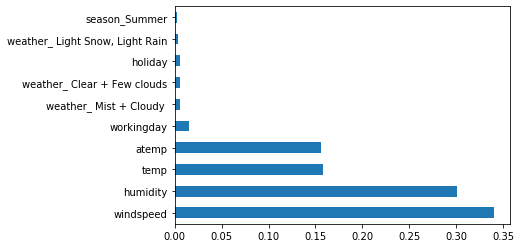

In [99]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()